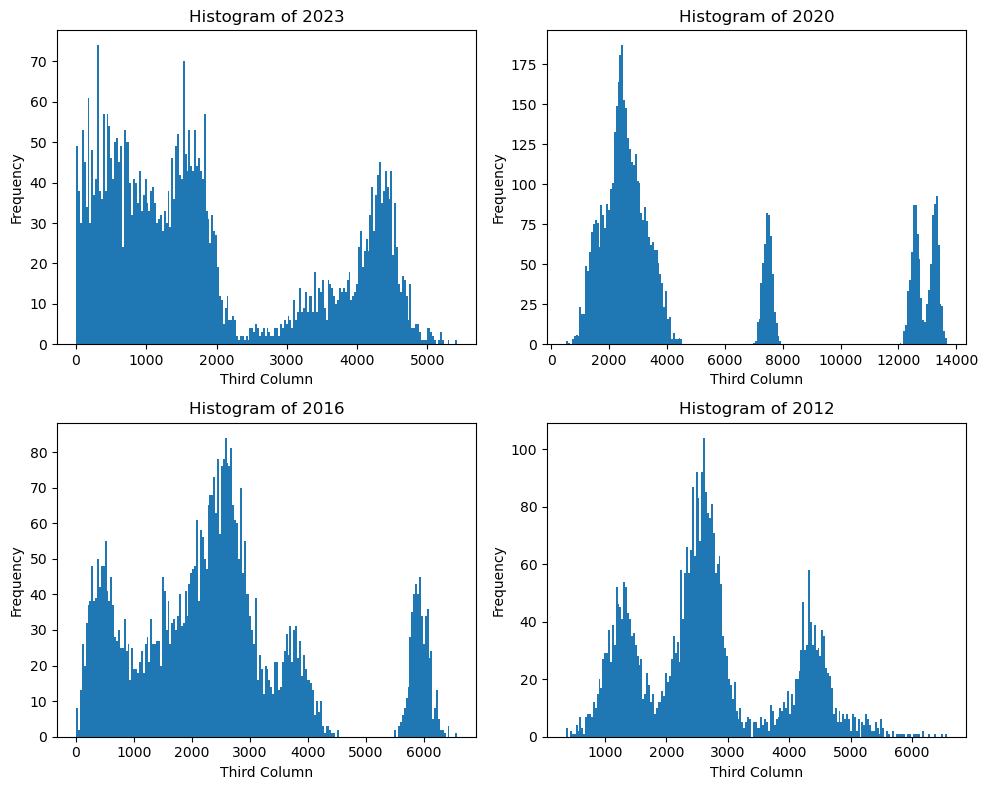

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the layout of the subplots
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

# Iterate over each year and plot the histogram in the corresponding subplot
for i, year in enumerate(["2023", "2020", "2016", "2012"]):
    row = i // cols
    col = i % cols
    df = pd.read_csv(f'lowest_samples{year}.csv', header=0)
    axes[row, col].hist(df.iloc[:, 2], bins=200)
    axes[row, col].set_xlabel('Third Column')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {year}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


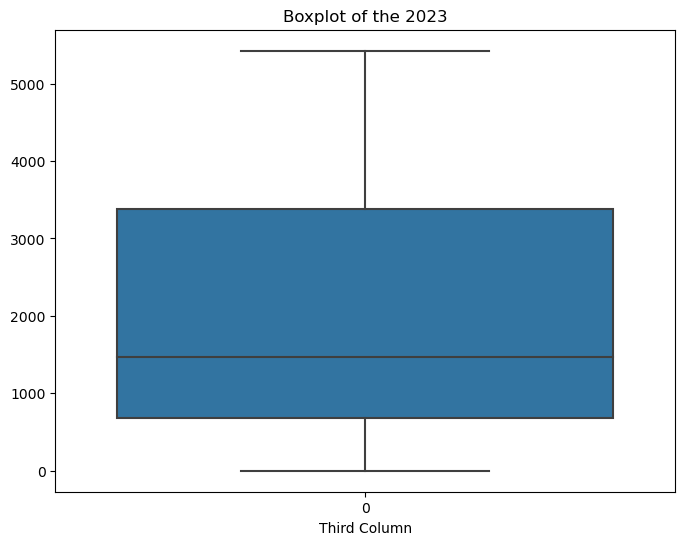

Year: 2023
Average: 1899.652077316152
Confidence Interval (95%): 1899.652077316152 ± 43.74914885253518
Dispersion (Variance): 2240896.9907027446
---------------------------------------


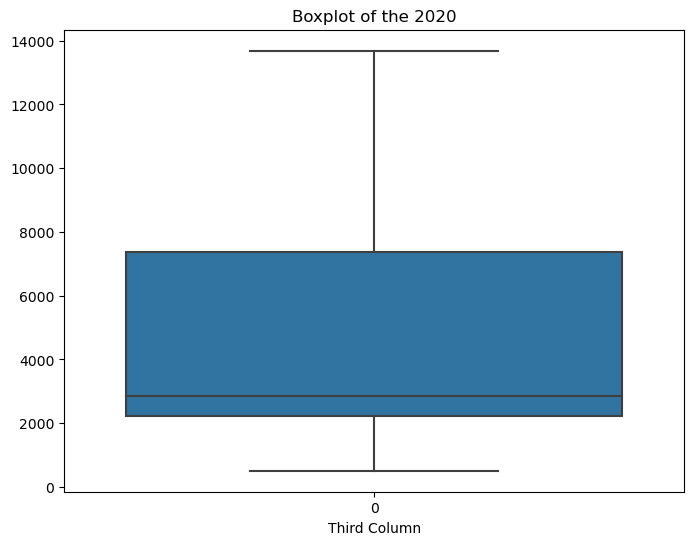

Year: 2020
Average: 4850.926181818182
Confidence Interval (95%): 4850.926181818182 ± 108.52618585716087
Dispersion (Variance): 16852541.895278145
---------------------------------------


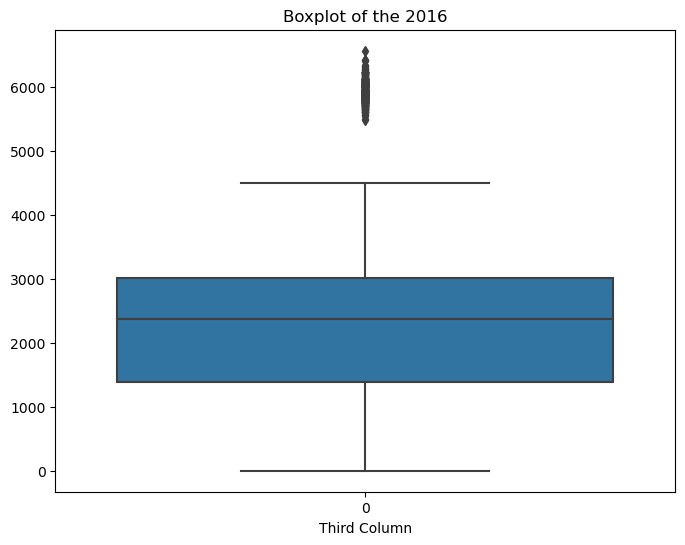

Year: 2016
Average: 2446.0182
Confidence Interval (95%): 2446.0182 ± 42.51009930116309
Dispersion (Variance): 2350503.299068765
---------------------------------------


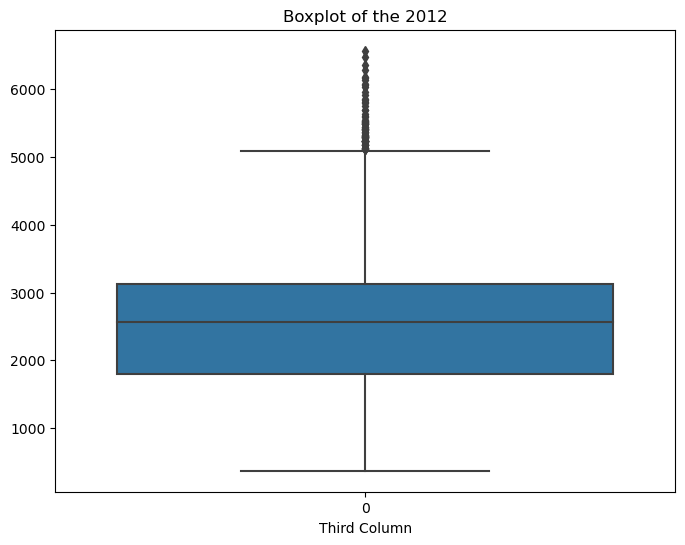

Year: 2012
Average: 2674.0495
Confidence Interval (95%): 2674.0495 ± 35.9371573622446
Dispersion (Variance): 1343630.1275497512
---------------------------------------


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define a function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, std_err = np.mean(data), stats.sem(data)
    margin_err = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, margin_err

for year in ["2023", "2020", "2016", "2012"]:
    df = pd.read_csv(f'lowest_samples{year}.csv', header=0)

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df.iloc[:, 2])
    plt.xlabel('Third Column')
    plt.title(f'Boxplot of the {year}')
    plt.show()

    # Calculate average, confidence interval, and dispersion
    avg = np.mean(df.iloc[:, 2])
    conf_interval = confidence_interval(df.iloc[:, 2])
    dispersion = np.var(df.iloc[:, 2])

    print(f'Year: {year}')
    print(f'Average: {avg}')
    print(f'Confidence Interval (95%): {conf_interval[0]} ± {conf_interval[1]}')
    print(f'Dispersion (Variance): {dispersion}')
    print('---------------------------------------')


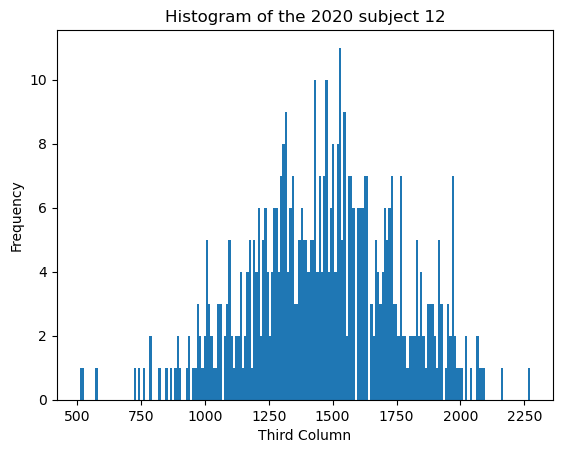

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'lowest_samples2020-p12.csv', header=0)

plt.hist(df.iloc[:, 2], bins=200)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title(f'Histogram of the 2020 subject 12')
plt.show()


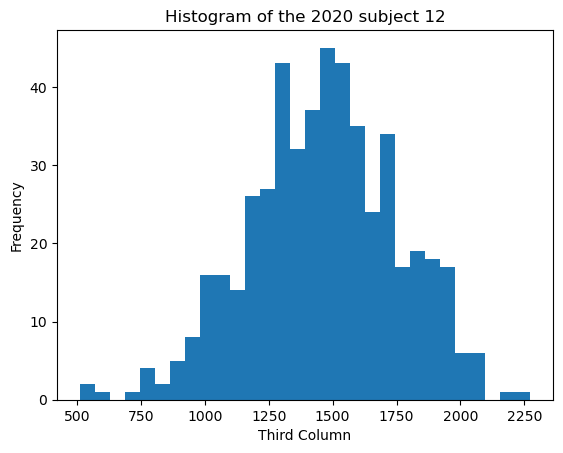

Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0
Average: 1466.236
Dispersion: 290.90007271226295
Confidence Interval (95%): [1440.7374843800255, 1491.7345156199747]
Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Plot histogram
plt.hist(data, bins=30)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title('Histogram of the 2020 subject 12')
plt.show()

# Perform Kolmogorov-Smirnov test for normality
ks_statistic, p_value = kstest(data, 'norm')


# Calculate average and dispersion
average = np.mean(data)
dispersion = np.std(data)

# Calculate confidence intervals
confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')
print(f'Average: {average}')
print(f'Dispersion: {dispersion}')
print(f'Confidence Interval (95%): [{confidence_interval_lower}, {confidence_interval_upper}]')

# Perform Kolmogorov-Smirnov test for logistic distribution
ks_statistic, p_value = kstest(data, 'laplace')

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')


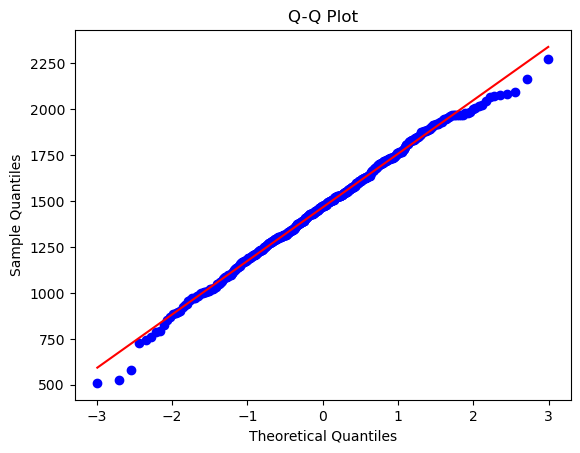

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


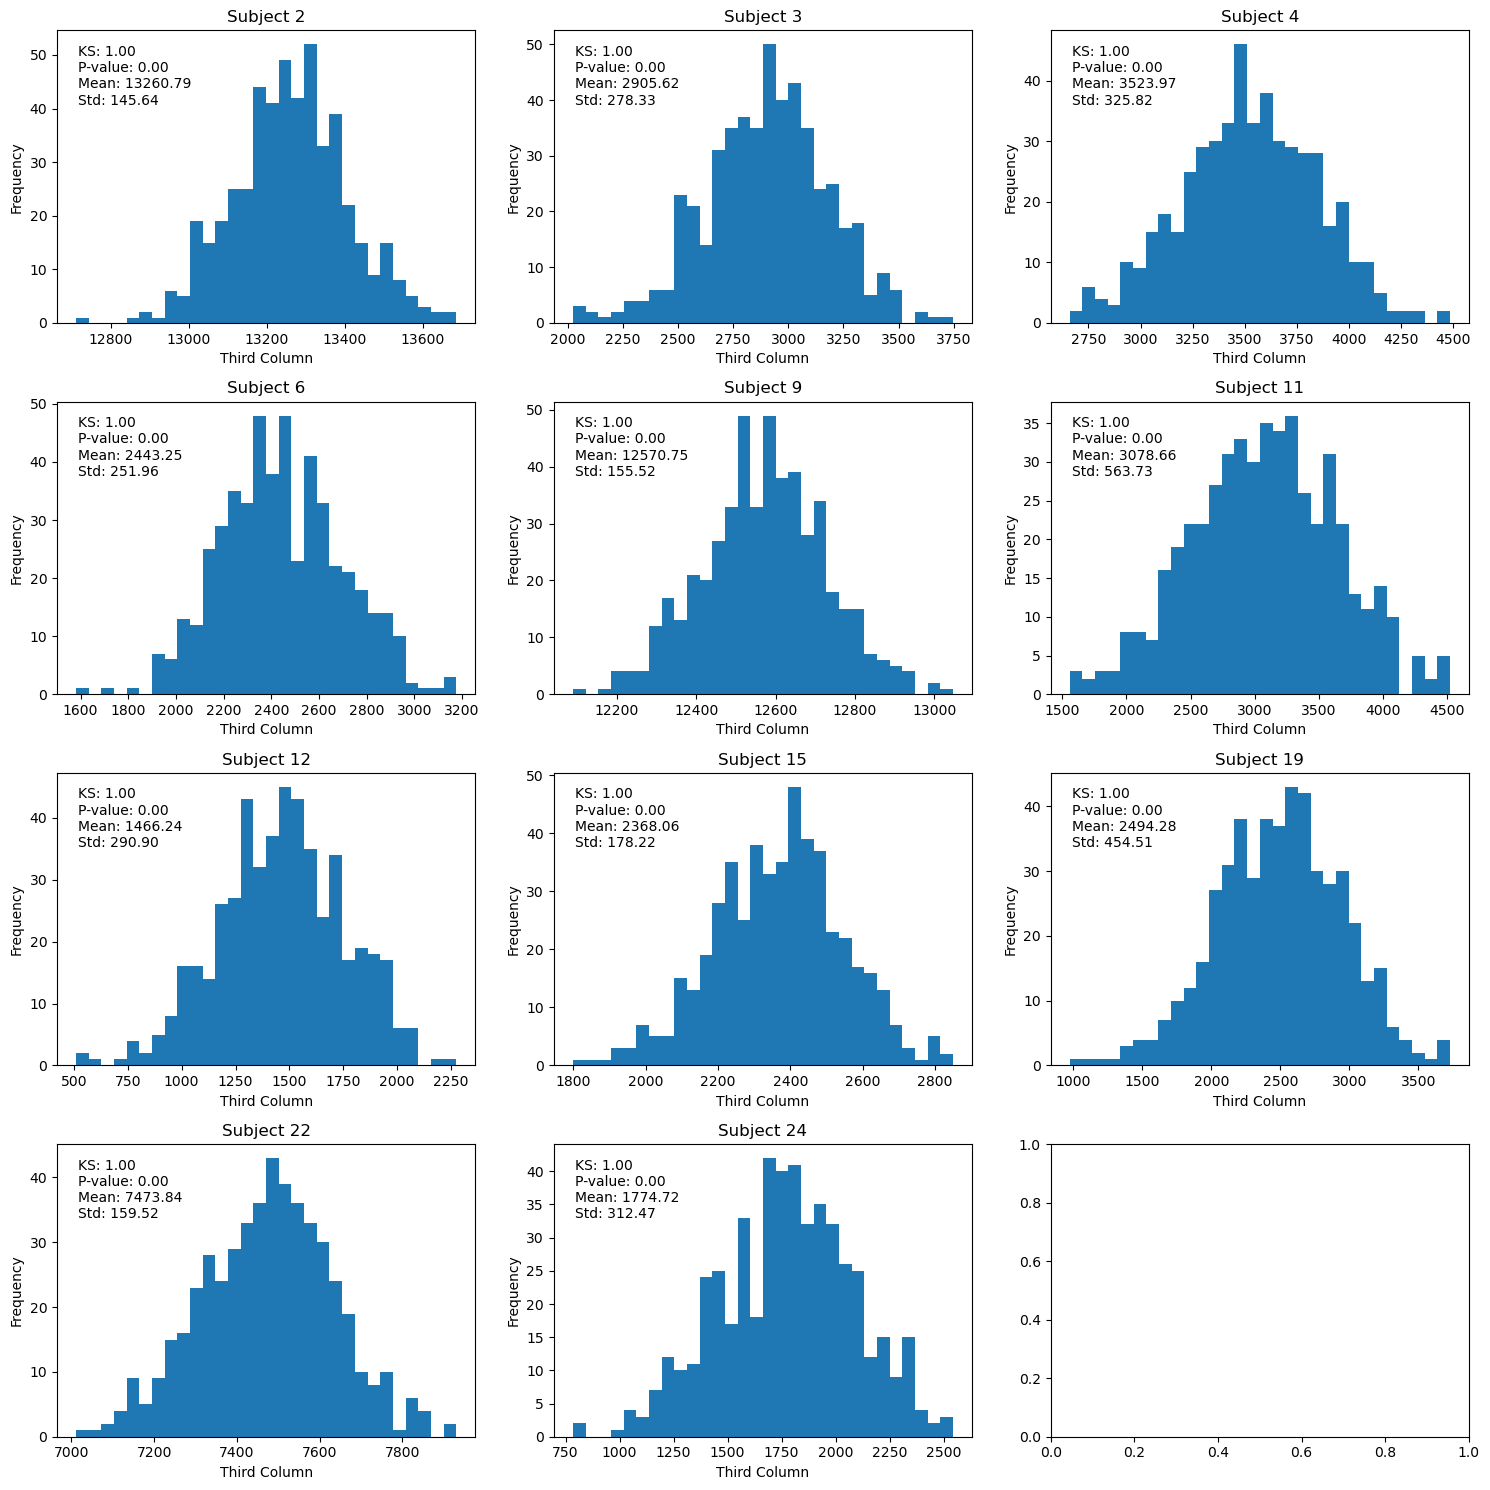

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Create a figure and axis object for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for subject, ax in zip(set(x if x not in (1, 5, 7, 8, 10, 13, 14, 16, 17, 18, 20, 21, 23, 25) else 12 for x in range(1, 26)), axs.flatten()):
    df = pd.read_csv(f'lowest_samples2020-p{subject}.csv')

    data = df.iloc[:, 2]

    ax.hist(data, bins=30)
    ax.set_xlabel('Third Column')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Subject {subject}')

    ks_statistic, p_value = kstest(data, 'norm')

    average = np.mean(data)
    dispersion = np.std(data)

    confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
    confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

    ax.text(0.05, 0.95, f'KS: {ks_statistic:.2f}\nP-value: {p_value:.2f}\nMean: {average:.2f}\nStd: {dispersion:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()
